<h1>Workshop 5 - Hierarchical Clustering

I am using the data from March 2020 to March 2021. I selected this data because I wish to analyse the difference in crime when we were under the strict first lockdown, to the less strict lockdowns scattered throughout the year of 2020.

In [1]:
import matplotlib.pyplot as plt
import folium
import os, re

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from IPython.display import IFrame
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
path_to_data = "./crime"
cd = os.path.dirname(os.path.abspath(path_to_data))

i = 0
columns = range(1,100)
dfList = []

for root, dirs, files in os.walk(cd):
    for fname in files:
        if re.match("^.*.csv$", fname):
            frame = pd.read_csv(os.path.join(root, fname))
            frame['key'] = "file{}".format(i)
            dfList.append(frame)
            i += 1

dataset = pd.concat(dfList)

In [3]:
dataset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,NaN,2020-03,West Midlands Police,West Midlands Police,-1.840082,52.593693,On or near Hillmorton Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0
1,4d4e0229ad53e59880b43b1399f6b7373fc11904a103b7...,2020-03,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Violence and sexual offences,Unable to prosecute suspect,NaN,file0
2,NaN,2020-03,West Midlands Police,West Midlands Police,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,Anti-social behaviour,NaN,NaN,file0
3,1c14e0daef1d51a238b5c249f10e9d3c08ab886a160125...,2020-03,West Midlands Police,West Midlands Police,-1.852324,52.596847,On or near Berkswell Close,E01009419,Birmingham 001C,Burglary,Investigation complete; no suspect identified,NaN,file0
4,620dab3bff39eaa91c8519540c14d0c91a674c96c07969...,2020-03,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Birmingham 001C,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0


In [4]:
print(dataset.shape)

(362579, 13)


In [5]:
name_number = 'ChristopherMitchell-2118979'
dataset.to_csv(name_number, index=False)

In [6]:
data = pd.read_csv(name_number)

In [7]:
data['Crime type'].value_counts()

Violence and sexual offences    140836
Anti-social behaviour            62420
Public order                     28419
Vehicle crime                    28015
Criminal damage and arson        25695
Burglary                         19892
Other theft                      17618
Shoplifting                      11630
Robbery                           7114
Drugs                             6481
Other crime                       6390
Possession of weapons             3779
Bicycle theft                     2268
Theft from the person             2022
Name: Crime type, dtype: int64

<h3>Q1: Using a similar approach display the number of crimes in each month. You can use the "Month" column to do that.

<h6>Answer 1.</h6>

In [8]:
data['Crime type'].groupby([data['Month']]).value_counts()

Month    Crime type                  
2020-03  Violence and sexual offences    8360
         Anti-social behaviour           2994
         Vehicle crime                   2629
         Criminal damage and arson       1872
         Burglary                        1730
                                         ... 
2021-03  Drugs                            669
         Robbery                          526
         Possession of weapons            433
         Bicycle theft                    152
         Theft from the person            136
Name: Crime type, Length: 182, dtype: int64

Next Section

In [9]:
data['town'] = data['LSOA name'].str.split(' ').str[0]

In [10]:
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
0,NaN,2020-03,West Midlands Police,West Midlands Police,-1.840082,52.593693,On or near Hillmorton Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0,Birmingham
1,4d4e0229ad53e59880b43b1399f6b7373fc11904a103b7...,2020-03,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Birmingham
2,NaN,2020-03,West Midlands Police,West Midlands Police,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,Anti-social behaviour,NaN,NaN,file0,Birmingham
3,1c14e0daef1d51a238b5c249f10e9d3c08ab886a160125...,2020-03,West Midlands Police,West Midlands Police,-1.852324,52.596847,On or near Berkswell Close,E01009419,Birmingham 001C,Burglary,Investigation complete; no suspect identified,NaN,file0,Birmingham
4,620dab3bff39eaa91c8519540c14d0c91a674c96c07969...,2020-03,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Birmingham 001C,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0,Birmingham


In [11]:
towns = ['Wolverhampton']
filtered_data = data[data.town.str.contains('|'.join(towns), na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
21120,fc35b7ab7c5bece1af3f87d686a15893dcbe03acbee620...,2020-03,West Midlands Police,West Midlands Police,-2.118919,52.618742,On or near Short Road,E01010434,Wolverhampton 001A,Other theft,Unable to prosecute suspect,NaN,file0,Wolverhampton
21121,a28c3965ca19e5d5db716b7ecfd9839f5e47beee597083...,2020-03,West Midlands Police,West Midlands Police,-2.127385,52.619488,On or near Crathorne Avenue,E01010434,Wolverhampton 001A,Robbery,Investigation complete; no suspect identified,NaN,file0,Wolverhampton
21122,74923a02a78ee6b15d3c2fb46ebce03f2e095e75d66d40...,2020-03,West Midlands Police,West Midlands Police,-2.126642,52.617924,On or near Marklin Avenue,E01010434,Wolverhampton 001A,Robbery,Investigation complete; no suspect identified,NaN,file0,Wolverhampton
21123,3a0a0750531a0500695dffc3da8238bd0658e450e76c52...,2020-03,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Shoplifting,Investigation complete; no suspect identified,NaN,file0,Wolverhampton
21124,ff303da43eee4dc6ba02dcc241a8275ddea4c0cccab606...,2020-03,West Midlands Police,West Midlands Police,-2.129427,52.620663,On or near Three Tuns Parade,E01010434,Wolverhampton 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN,file0,Wolverhampton


<h3>Q2: Display crime types in Wolverhampton.

<h6>Answer 2</h6>

In [12]:
filtered_data['Crime type'].unique()

array(['Other theft', 'Robbery', 'Shoplifting',
       'Violence and sexual offences', 'Burglary',
       'Anti-social behaviour', 'Other crime',
       'Criminal damage and arson', 'Vehicle crime',
       'Possession of weapons', 'Public order', 'Theft from the person',
       'Drugs', 'Bicycle theft'], dtype=object)

There are 14 total crime types in the dataset that is filtered to Wolverhampton.

In [13]:
filtered_data['LSOA code'].value_counts().nlargest(10)

E01010521    1826
E01010564     853
E01010414     697
E01010450     618
E01010473     528
E01010472     509
E01010410     504
E01010476     453
E01010506     452
E01010528     449
Name: LSOA code, dtype: int64

<h3>Q3: Provide a prime landmark of at least 2 LSOA code. If there is no recognisable prime landmark, provide name(s) of the nearby streets/roadssorrounding that area.

<h6>Answer 3.</h6><p>E01010521 is by the local landmark of Molineux Stadium.</p><p>E01010414 is at the crossing for Pipes Meadow and Hall Street, near Bilston Police Station</p>

In [14]:
filtered_data_data = filtered_data[['LSOA code','Crime type']]
filtered_data_data.head()

,LSOA code,Crime type
21120,E01010434,Other theft
21121,E01010434,Robbery
21122,E01010434,Robbery
21123,E01010434,Shoplifting
21124,E01010434,Violence and sexual offences


In [15]:
filtered_important_data = filtered_data[['LSOA code','Crime type']]
filtered_important_data = pd.get_dummies(filtered_important_data, columns=['Crime type'])
clustering_data = filtered_important_data.groupby(['LSOA code']).agg({'Crime type_Anti-social behaviour':'sum',
                                                                      'Crime type_Bicycle theft':'sum',
                                                                      'Crime type_Burglary':'sum',
                                                                      'Crime type_Criminal damage and arson':'sum',
                                                                      'Crime type_Drugs':'sum',
                                                                      'Crime type_Other crime':'sum',
                                                                      'Crime type_Other theft':'sum',
                                                                      'Crime type_Possession of weapons':'sum',
                                                                      'Crime type_Public order':'sum',
                                                                      'Crime type_Robbery':'sum',
                                                                      'Crime type_Shoplifting':'sum',
                                                                      'Crime type_Theft from the person':'sum',
                                                                      'Crime type_Vehicle crime':'sum',
                                                                      'Crime type_Violence and sexual offences':'sum'}).reset_index()

In [16]:
clustering_data[:5]

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01010410,82.0,5,22,33,7,8,88,4,49,7,23,2,51,123.0
1,E01010411,19.0,0,6,8,3,10,7,4,14,0,0,0,5,90.0
2,E01010412,54.0,1,9,29,5,5,6,4,28,4,0,1,33,166.0
3,E01010413,36.0,2,12,19,1,5,12,2,23,9,75,0,9,96.0
4,E01010414,107.0,3,49,28,16,11,34,9,59,9,67,10,65,230.0


In [17]:
clustering_data_origional = clustering_data.copy()
clustering_data_origional.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01010410,82.0,5,22,33,7,8,88,4,49,7,23,2,51,123.0
1,E01010411,19.0,0,6,8,3,10,7,4,14,0,0,0,5,90.0
2,E01010412,54.0,1,9,29,5,5,6,4,28,4,0,1,33,166.0
3,E01010413,36.0,2,12,19,1,5,12,2,23,9,75,0,9,96.0
4,E01010414,107.0,3,49,28,16,11,34,9,59,9,67,10,65,230.0


In [18]:
clustering_data.drop(['LSOA code'], axis = 1, inplace = True, errors = 'ignore')
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,82.0,5,22,33,7,8,88,4,49,7,23,2,51,123.0
1,19.0,0,6,8,3,10,7,4,14,0,0,0,5,90.0
2,54.0,1,9,29,5,5,6,4,28,4,0,1,33,166.0
3,36.0,2,12,19,1,5,12,2,23,9,75,0,9,96.0
4,107.0,3,49,28,16,11,34,9,59,9,67,10,65,230.0


In [19]:
data_scaled = normalize(clustering_data)
data_scaled = pd.DataFrame(data_scaled, columns=clustering_data.columns)
data_scaled.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.426829,0.026026,0.114515,0.171773,0.036437,0.041642,0.458060,0.020821,0.255056,0.036437,0.119720,0.010410,0.265467,0.640243
1,0.200769,0.000000,0.063401,0.084534,0.031700,0.105668,0.073968,0.042267,0.147935,0.000000,0.000000,0.000000,0.052834,0.951011
2,0.295532,0.005473,0.049255,0.158712,0.027364,0.027364,0.032837,0.021891,0.153239,0.021891,0.000000,0.005473,0.180603,0.908488
3,0.272049,0.015114,0.090683,0.143581,0.007557,0.037785,0.090683,0.015114,0.173809,0.068012,0.566769,0.000000,0.068012,0.725464
4,0.374729,0.010506,0.171605,0.098060,0.056034,0.038524,0.119073,0.031519,0.206626,0.031519,0.234643,0.035021,0.227639,0.805492


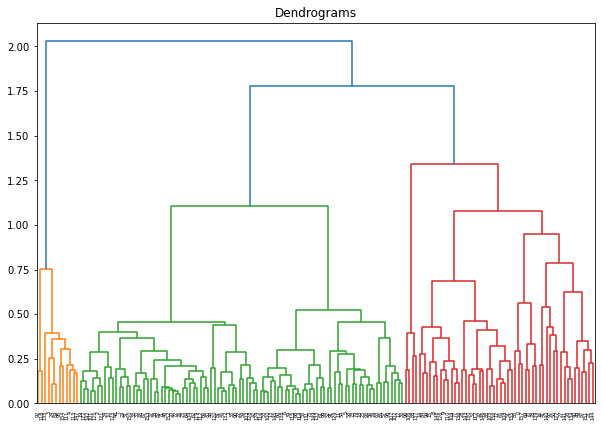

In [20]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

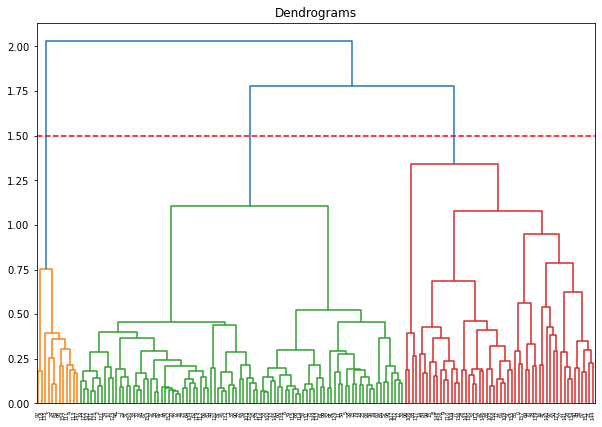

In [21]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

<h3>Q4. Discuss what happens when you decide to cut the dendrogram in different level.

<h6>Answer 4.</h6><p> Cutting the Dendrogram on different levels, will vary the set of clusters. In the above example, with Y set to intersect at 1.5, we can se it splits the dataset into 3 clusters.</p><p> If we were to set the Y to 1.25, then we would see 4 clusters.</p>

In [22]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_ids = cluster.fit_predict(data_scaled)

In [23]:
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,82.0,5,22,33,7,8,88,4,49,7,23,2,51,123.0,0
1,19.0,0,6,8,3,10,7,4,14,0,0,0,5,90.0,2
2,54.0,1,9,29,5,5,6,4,28,4,0,1,33,166.0,2
3,36.0,2,12,19,1,5,12,2,23,9,75,0,9,96.0,1
4,107.0,3,49,28,16,11,34,9,59,9,67,10,65,230.0,1


In [24]:
hiarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,24.8,1.0,11.0,9.6,2.3,2.9,10.0,1.4,10.5,2.2,2.6,0.7,15.4,51.9
1,66.2,6.2,21.8,24.3,6.9,4.6,23.2,4.9,39.5,9.5,70.7,8.8,25.2,138.3
2,37.1,1.2,9.9,17.5,3.7,5.1,9.1,2.6,18.4,3.0,3.2,1.1,14.5,109.9


<h3>Q5. Discuss the cluster results based on your dataset.

<h6>Answer 5.</h6>
<p>There is a high correlation between crime types within the same cluster. This is evident in cluster zero where crime types such as Possession of wepaons has a low correlation to Violence and sexual offences but a high correlation to  Bicycle theft.</p>
<p>The correlation between clusters depends on the cluster, as cluster zero and 2 have a moderate degree of correlation but zero and one have very little correlation.</p>

In [25]:
clustering_data_origional['cluster'] = cluster_ids
clusters = clustering_data_origional[['LSOA code','cluster']]

In [26]:
clusters.head()

,LSOA code,cluster
0,E01010410,0
1,E01010411,2
2,E01010412,2
3,E01010413,1
4,E01010414,1


In [27]:
clustered_full = pd.merge(filtered_data, clusters, on='LSOA code')
clustered_full.head(10)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town,cluster
0,fc35b7ab7c5bece1af3f87d686a15893dcbe03acbee620...,2020-03,West Midlands Police,West Midlands Police,-2.118919,52.618742,On or near Short Road,E01010434,Wolverhampton 001A,Other theft,Unable to prosecute suspect,NaN,file0,Wolverhampton,1
1,a28c3965ca19e5d5db716b7ecfd9839f5e47beee597083...,2020-03,West Midlands Police,West Midlands Police,-2.127385,52.619488,On or near Crathorne Avenue,E01010434,Wolverhampton 001A,Robbery,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,1
2,74923a02a78ee6b15d3c2fb46ebce03f2e095e75d66d40...,2020-03,West Midlands Police,West Midlands Police,-2.126642,52.617924,On or near Marklin Avenue,E01010434,Wolverhampton 001A,Robbery,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,1
3,3a0a0750531a0500695dffc3da8238bd0658e450e76c52...,2020-03,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Shoplifting,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,1
4,ff303da43eee4dc6ba02dcc241a8275ddea4c0cccab606...,2020-03,West Midlands Police,West Midlands Police,-2.129427,52.620663,On or near Three Tuns Parade,E01010434,Wolverhampton 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,1
5,846713e0b7756978801120e1d17b05f24cb9692ad1eb05...,2020-03,West Midlands Police,West Midlands Police,-2.121066,52.615251,On or near Purcell Road,E01010434,Wolverhampton 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,1
6,b3597ccf99438da12229ce0e918b5aa461729d608dc2c5...,2020-03,West Midlands Police,West Midlands Police,-2.129317,52.618605,On or near Barrington Close,E01010434,Wolverhampton 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Wolverhampton,1
7,e1eb9f3efa1ddc48190e4dde443f11dc715919302c71b3...,2020-03,West Midlands Police,West Midlands Police,-2.120391,52.616843,On or near Ringwood Road,E01010434,Wolverhampton 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Wolverhampton,1
8,797e0f2047405d7bdac57b430e581d5126d00563205ec3...,2020-03,West Midlands Police,West Midlands Police,-2.121066,52.615251,On or near Purcell Road,E01010434,Wolverhampton 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Wolverhampton,1
9,a9d8d660cc185e6200fabbac7757c59ff308d6feefeea8...,2020-03,West Midlands Police,West Midlands Police,-2.121066,52.615251,On or near Purcell Road,E01010434,Wolverhampton 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Wolverhampton,1


In [28]:
def get_color(cluster_id):
    if cluster_id == 1:
        return 'darkred'
    if cluster_id == 0:
        return 'green'
    if cluster_id == 2:
        return 'yellow'

In [29]:
# Create a map
this_map = folium.Map(location=[clustered_full["Latitude"].mean(),clustered_full["Longitude"].mean()], zoom_start=5)

def plot_dot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMaker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2,
                        colour=point.color,
                        weight=1).add_to(this_map)

clustered_full["color"] = clustered_full["cluster"].apply(lambda x: get_color(x))

# Use df.apply(,axis=1) to iterate through every row in your dataframe
clustered_full.apply(plot_dot, axis = 1)

this_map.fit_bounds(this_map.get_bounds())
this_map.save(os.path.join('Crime_map.html'))

<h3>Report</h3>
<p><b>Answer the following questions:</b></p>
<p>1. Discuss the results (your understanding) of the clustering algorithm on clustering crime dataset used in this work.</p>

In [30]:
hiarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,24.8,1.0,11.0,9.6,2.3,2.9,10.0,1.4,10.5,2.2,2.6,0.7,15.4,51.9
1,66.2,6.2,21.8,24.3,6.9,4.6,23.2,4.9,39.5,9.5,70.7,8.8,25.2,138.3
2,37.1,1.2,9.9,17.5,3.7,5.1,9.1,2.6,18.4,3.0,3.2,1.1,14.5,109.9


The results of the hierarchical clustering are that there are, that 3 distinct groups form. The crimes within each cluster share similar relations, and thus join that cluster.

Examples of this are that, for example, there is a relationship between robbery and shoplifting, whereas there is little correlation between crimes of a very different nature, such as Theft from a person and violence and sexual offences.

As well as looking at the data from the clusters, reviewing the crime map allows us to visualise the crime data, by presenting it in a format that is easy to see the location of the crimes and show which areas the most crimes occur. This map shows relatively clearly that higher population areas have more individual incidents of crime, as you would expect, but that all areas in the dataset have had some form of crime during the period of lockdowns.


<b>2. Change the number of clusters to a different value and perform the clustering algorithm and draw the graph again. Discuss your results briefly.

In [31]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_ids = cluster.fit_predict(data_scaled)

In [32]:
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,82.0,5,22,33,7,8,88,4,49,7,23,2,51,123.0,2
1,19.0,0,6,8,3,10,7,4,14,0,0,0,5,90.0,0
2,54.0,1,9,29,5,5,6,4,28,4,0,1,33,166.0,0
3,36.0,2,12,19,1,5,12,2,23,9,75,0,9,96.0,1
4,107.0,3,49,28,16,11,34,9,59,9,67,10,65,230.0,1


In [33]:
hiarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,37.1,1.2,9.9,17.5,3.7,5.1,9.1,2.6,18.4,3.0,3.2,1.1,14.5,109.9
1,66.2,6.2,21.8,24.3,6.9,4.6,23.2,4.9,39.5,9.5,70.7,8.8,25.2,138.3
2,22.0,1.0,11.2,9.6,2.2,3.0,10.2,1.4,10.5,2.1,2.7,0.8,15.9,51.7
3,60.5,1.8,8.8,10.5,3.5,2.0,8.0,1.2,10.5,3.2,0.8,0.5,8.5,54.2


By expanding the number of clusters, we can see the new cluster is closer in correlation to cluster number 1 as shown in the Anti-social behaviour, but still has some level of correlation to clusters 0 and 2, such as with possession of weapons and robbery.

<B>3. New clustering for Lichfield

In [34]:
df = pd.read_csv('ChristopherMitchell-2118979')

In [35]:
df['town'] = df['LSOA name'].str.split(' ').str[0]

In [36]:
df['LSOA name'].unique()

array(['Birmingham 001B', 'Birmingham 001C', 'Birmingham 001D', ...,
       'Richmondshire 001B', 'Shropshire 036C', 'Wyre Forest 007B'],
      dtype=object)

In [37]:
towns = ['Lichfield']
filtered_data = df[df.town.str.contains('|'.join(towns), na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
14811,af5685a83cebe2d505bd2d788d40b6827ad1b65a8292c1...,2020-03,West Midlands Police,West Midlands Police,-1.744749,52.641874,On or near Hopwas Hill,E01029517,Lichfield 008B,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Lichfield
38578,0a4dbfcd2e8232fa5efe6204e2165f847ba1b47b6f0168...,2020-04,West Midlands Police,West Midlands Police,-1.901583,52.665489,On or near Middleton Close,E01029505,Lichfield 009E,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file1,Lichfield
63819,NaN,2020-05,West Midlands Police,West Midlands Police,-1.873055,52.585418,On or near Horsley Road,E01029514,Lichfield 011B,Anti-social behaviour,NaN,NaN,file2,Lichfield
63820,22849ee6ba259f5a05c02b3aaf847585412e75db35f668...,2020-05,West Midlands Police,West Midlands Police,-1.867999,52.588280,On or near Streetly Lane,E01029514,Lichfield 011B,Vehicle crime,Investigation complete; no suspect identified,NaN,file2,Lichfield
63821,8f66299945461f5c274129313e38c1472c8246af1b257e...,2020-05,West Midlands Police,West Midlands Police,-1.867999,52.588280,On or near Streetly Lane,E01029514,Lichfield 011B,Violence and sexual offences,Investigation complete; no suspect identified,NaN,file2,Lichfield


In [38]:
filtered_lichfield = filtered_data[['LSOA code','Crime type']]
filtered_lichfield.head()

,LSOA code,Crime type
14811,E01029517,Violence and sexual offences
38578,E01029505,Criminal damage and arson
63819,E01029514,Anti-social behaviour
63820,E01029514,Vehicle crime
63821,E01029514,Violence and sexual offences


In [39]:
filtered_lichfield = filtered_data[['LSOA code','Crime type']]
filtered_lichfield = pd.get_dummies(filtered_lichfield, columns=['Crime type'])
clustering_data_lichfield = filtered_lichfield.groupby(['LSOA code']).agg({'Crime type_Anti-social behaviour':'sum',
                                                                      'Crime type_Bicycle theft':'sum',
                                                                      'Crime type_Burglary':'sum',
                                                                      'Crime type_Criminal damage and arson':'sum',
                                                                      'Crime type_Drugs':'sum',
                                                                      'Crime type_Other theft':'sum',
                                                                      'Crime type_Public order':'sum',
                                                                      'Crime type_Shoplifting':'sum',
                                                                      'Crime type_Vehicle crime':'sum',
                                                                      'Crime type_Violence and sexual offences':'sum'}).reset_index()

In [40]:
clustering_data_lichfield[:5]

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other theft,Crime type_Public order,Crime type_Shoplifting,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01029488,0,0,1,0,1,1,0,0,0,0
1,E01029497,0,0,1,1,0,0,0,0,0,1
2,E01029505,1,0,0,1,0,0,2,1,1,0
3,E01029513,0,1,3,0,1,0,1,0,0,3
4,E01029514,1,0,0,0,0,1,0,0,3,7


In [41]:
clustering_data_lichfield_org = clustering_data_lichfield.copy()
clustering_data_lichfield_org.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other theft,Crime type_Public order,Crime type_Shoplifting,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01029488,0,0,1,0,1,1,0,0,0,0
1,E01029497,0,0,1,1,0,0,0,0,0,1
2,E01029505,1,0,0,1,0,0,2,1,1,0
3,E01029513,0,1,3,0,1,0,1,0,0,3
4,E01029514,1,0,0,0,0,1,0,0,3,7


In [42]:
clustering_data_lichfield.drop(['LSOA code'], axis = 1, inplace = True, errors = 'ignore')
clustering_data_lichfield.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other theft,Crime type_Public order,Crime type_Shoplifting,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0,0,1,0,1,1,0,0,0,0
1,0,0,1,1,0,0,0,0,0,1
2,1,0,0,1,0,0,2,1,1,0
3,0,1,3,0,1,0,1,0,0,3
4,1,0,0,0,0,1,0,0,3,7


In [43]:
data_scaled = normalize(clustering_data_lichfield)
data_scaled = pd.DataFrame(data_scaled, columns=clustering_data_lichfield.columns)
data_scaled.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other theft,Crime type_Public order,Crime type_Shoplifting,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.000000,0.000000,0.577350,0.000000,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350
2,0.353553,0.000000,0.000000,0.353553,0.000000,0.000000,0.707107,0.353553,0.353553,0.000000
3,0.000000,0.218218,0.654654,0.000000,0.218218,0.000000,0.218218,0.000000,0.000000,0.654654
4,0.129099,0.000000,0.000000,0.000000,0.000000,0.129099,0.000000,0.000000,0.387298,0.903696


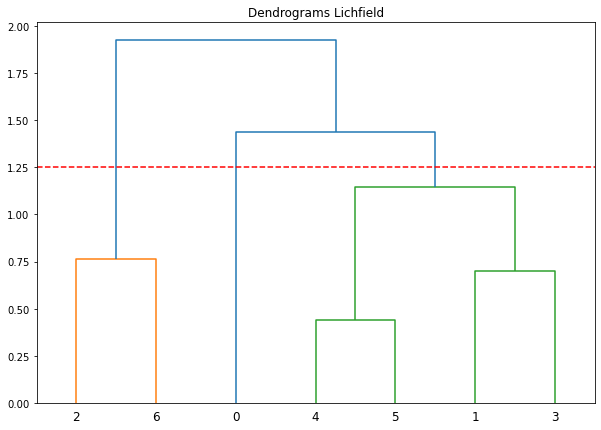

In [44]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms Lichfield")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.25, color='r', linestyle='--')

In [45]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_ids = cluster.fit_predict(data_scaled)

In [46]:
clustering_data_lichfield['cluster'] = cluster_ids
clustering_data_lichfield.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other theft,Crime type_Public order,Crime type_Shoplifting,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,0,0,1,0,1,1,0,0,0,0,2
1,0,0,1,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,2,1,1,0,1
3,0,1,3,0,1,0,1,0,0,3,0
4,1,0,0,0,0,1,0,0,3,7,0


In [47]:
hiarchical_cluster = pd.DataFrame(round(clustering_data_lichfield.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other theft,Crime type_Public order,Crime type_Shoplifting,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,
0,0.2,0.2,1.0,0.2,0.2,0.2,0.2,0.0,0.8,3.0
1,0.5,0.0,0.0,0.5,0.0,0.0,1.5,0.5,0.5,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
